# Evaluación del modelo entrenado previamente

In [1]:
!pwd

/home/mario/Documents/ScenesRecognition-AYUDAME/BoVW


In [2]:
import pickle
from joblib import dump, load
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from BoVW import getBoVWRepresentation

## Carga del modelo y del codebook

In [3]:
model = load("model02.joblib")
stdSlr = load("standard_scaler02.joblib")
codebook = np.load("codebook02.npy")

In [4]:
model.get_params()

{'C': 4.45,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [5]:
stdSlr.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [6]:
print(f"mean = {np.mean(stdSlr.mean_)}")
print(f"var = {np.mean(stdSlr.var_)}")

mean = 0.01160576923076923
var = 0.011663043063773743


In [7]:
codebook.shape

(256, 180)

## Carga de los datos de prueba

In [8]:
class_names = np.load("Datasets/data05/class_names_05.npy")
pcd_names = np.load("Datasets/data05/pcd_names_05.npy")
targets = np.load("Datasets/data05/targets_05.npy")
filehandler = open("Datasets/data05/bofs_05.bin", 'rb')
bofs = pickle.load(filehandler)
filehandler.close()

## Análisis exploratorio de datos

In [9]:
class_names

array(['chess', 'fire', 'heads', 'office', 'pumpkin', 'redkitchen',
       'stairs'], dtype='<U10')

In [10]:
print(pcd_names[:3])
print(pcd_names.shape)

['frame-000000' 'frame-000001' 'frame-000002']
(6461,)


In [11]:
print(targets[:3])
print(targets.shape)

[0 0 0]
(6461,)


In [12]:
print(len(bofs))
for bof in bofs[:3]:
    print(bof.shape)

6461
(4, 180)
(4, 180)
(4, 180)


In [13]:
bofs_np = np.vstack(bofs)
bofs_np.shape

(19123, 180)

In [14]:
classes,count_classes = np.unique(targets, return_counts=True)
class_dict = dict(zip(classes.astype('int'),count_classes))
print(class_dict)

{0: 961, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 500}


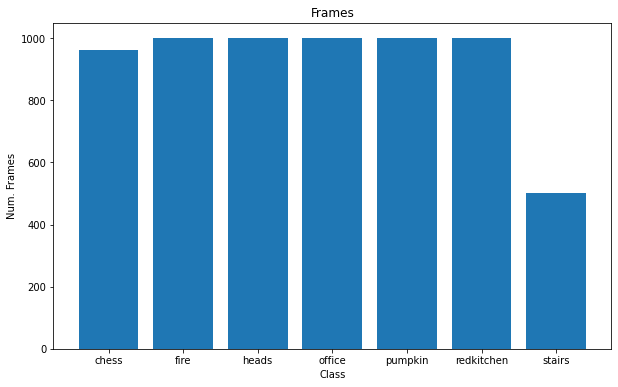

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(classes, count_classes,tick_label=class_names)
plt.title('Frames')
plt.ylabel('Num. Frames')
plt.xlabel('Class')
plt.show()

## Preprocesamiento de datos

Se obtiene la representación BoVW

In [16]:
vw_test = getBoVWRepresentation(bofs,codebook)
vw_test.shape

Extracting visual word representations
Done in 1.095564365386963 secs.


(6461, 256)

Se estandarizan los datos de prueba

In [17]:
test = vw_test
test = stdSlr.transform(test)

## Validación de resultados

Exactitud del modelo

In [18]:
%%time
y_test = targets # valores reales
acc = 100*model.score(test, y_test)
print(f"La exatitud del modelo es: {acc}")

La exatitud del modelo es: 26.06407676830212
CPU times: user 5.79 s, sys: 15.1 ms, total: 5.81 s
Wall time: 5.88 s


In [19]:
test_pred = model.predict(test)

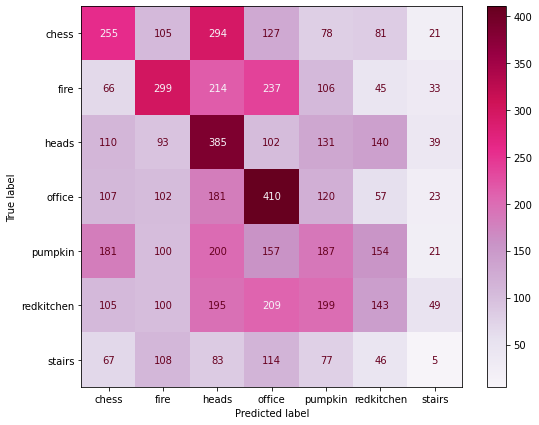

In [20]:
fig, ax = plt.subplots(figsize=(9,7))
cmd = ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_pred,
                                              ax=ax,cmap='PuRd',display_labels=class_names)
plt.show()


In [21]:
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.29      0.27      0.28       961
           1       0.33      0.30      0.31      1000
           2       0.25      0.39      0.30      1000
           3       0.30      0.41      0.35      1000
           4       0.21      0.19      0.20      1000
           5       0.21      0.14      0.17      1000
           6       0.03      0.01      0.01       500

    accuracy                           0.26      6461
   macro avg       0.23      0.24      0.23      6461
weighted avg       0.25      0.26      0.25      6461

